In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/df_one_hot_encoded_normalized.csv")
df

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),...,Father's occupation_172,Father's occupation_174,Father's occupation_175,Father's occupation_181,Father's occupation_182,Father's occupation_183,Father's occupation_192,Father's occupation_193,Father's occupation_194,Father's occupation_195
0,5,0.453026,0.472707,0.074267,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.415405,0.369970,0.049329,0.0,0.015578,0.015578,0.015578,0.036348,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.439165,0.449244,0.068395,0.0,0.021598,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.371466,0.364158,0.060896,0.0,0.018269,0.024358,0.018269,0.040887,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.285850,0.404478,0.128633,0.0,0.017151,0.025727,0.014293,0.035255,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6,0.379401,0.370902,0.057669,0.0,0.018211,0.021246,0.015176,0.041279,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,2,0.384615,0.381410,0.057692,0.0,0.019231,0.019231,0.019231,0.038462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,1,0.383168,0.371972,0.074643,0.0,0.017417,0.019905,0.017417,0.037104,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,1,0.438383,0.374574,0.048709,0.0,0.012177,0.012177,0.012177,0.033609,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data = df[(df['Target']== '0') | (df['Target']== '1')] # Training data (rows labeled 0 and 1)
test_data = df[df['Target'] == 'Enrolled']  # Test data (rows labeled "Enrolled")

# Separate features and target for training data
X_train = train_data.drop(columns=['Target'])
y_train = train_data['Target']

# Separate features for test data (since you won't have target values for test)
X_test = test_data.drop(columns=['Target'])

# Print the shape of the splits to verify
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (3630, 252)
Test data shape: (794, 252)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the SVM model on the training split
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_pred = svm_model.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on the validation set:", accuracy)


Accuracy on the validation set: 0.778236914600551


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.6s
[CV] END ........................C=0.1, gamma=1

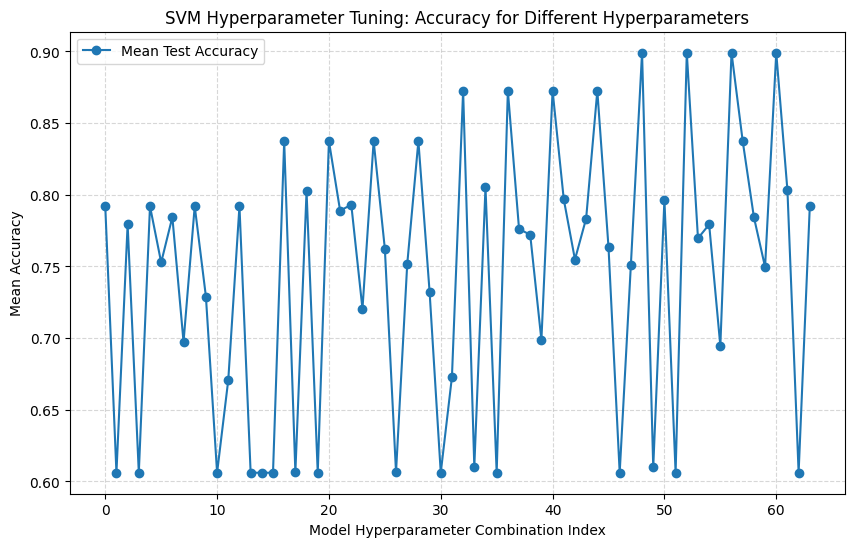

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the results from GridSearchCV or RandomizedSearchCV
# Use the `cv_results_` attribute to get the cross-validation results
results = grid_search.cv_results_  # Or use `random_search.cv_results_` if using RandomizedSearchCV

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting the mean test scores for different combinations of hyperparameters
plt.figure(figsize=(10, 6))
plt.plot(results_df['mean_test_score'], marker='o', linestyle='-', label='Mean Test Accuracy')

# Adding labels to the plot
plt.xlabel('Model Hyperparameter Combination Index')
plt.ylabel('Mean Accuracy')
plt.title('SVM Hyperparameter Tuning: Accuracy for Different Hyperparameters')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter distribution
param_dist = {
    'C': np.logspace(-2, 2, 10),  # Logarithmic scale for C
    'gamma': np.logspace(-3, 1, 10),  # Logarithmic scale for gamma
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', verbose=2, random_state=42)
random_search.fit(X_train_split, y_train_split)

# Get the best parameters and accuracy
print("Best Hyperparameters from RandomizedSearchCV:", random_search.best_params_)
print("Best Accuracy from RandomizedSearchCV:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=1.6681005372000592, gamma=0.007742636826811269, kernel=rbf; total time=   1.0s
[CV] END C=1.6681005372000592, gamma=0.007742636826811269, kernel=rbf; total time=   1.0s
[CV] END C=1.6681005372000592, gamma=0.007742636826811269, kernel=rbf; total time=   1.0s
[CV] END C=1.6681005372000592, gamma=0.007742636826811269, kernel=rbf; total time=   0.7s
[CV] END C=1.6681005372000592, gamma=0.007742636826811269, kernel=rbf; total time=   0.7s
[CV] END ...C=12.915496650148826, gamma=0.001, kernel=linear; total time=   1.9s
[CV] END ...C=12.915496650148826, gamma=0.001, kernel=linear; total time=   1.9s
[CV] END ...C=12.915496650148826, gamma=0.001, kernel=linear; total time=   1.7s
[CV] END ...C=12.915496650148826, gamma=0.001, kernel=linear; total time=   1.4s
[CV] END ...C=12.915496650148826, gamma=0.001, kernel=linear; total time=   1.7s
[CV] END ........C=0.01, gamma=3.593813663804626, kernel=rbf; total time=   1.6s
[C